In [13]:
""" Scenario: AI Model for Detecting Defective Products in a Factory

A manufacturing company wants to build an AI system that detects defective products from camera images on the production line.

They have collected 100 product images, and each image is labeled as:

0 → Non-defective product

1 → Defective product

To build a reliable AI model, the data scientist must divide the dataset into three parts:

Training set (70%) → Used to train the AI model

Validation set (15%) → Used to tune and improve the model

Test set (15%) → Used to evaluate final performance

Your task is to help the data scientist split the dataset correctly. """

import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("housing_dataset - Sheet1.csv")

x = df[['size','bedrooms','bathrooms','age','location']]
y = df['price']

# Step 1: 15% test
x_temp, x_test, y_temp, y_test = train_test_split(
    x, y, test_size=0.15, random_state=42
)

# Step 2: split remaining 85% into 70% train, 15% val
x_train, x_val, y_train, y_val = train_test_split(
    x_temp, y_temp, test_size=0.1765, random_state=42
)

print(f"Training set: {len(x_train)} samples")
print(f"Validation set: {len(x_val)} samples")
print(f"Test set: {len(x_test)} samples")

Training set: 6 samples
Validation set: 2 samples
Test set: 2 samples


In [26]:
""" Scenario: AI System for Music Genre Classification

A music streaming company wants to build an AI model that automatically identifies the genre of songs (for example: Rock, Pop, Classical, etc.).

They have collected 100 audio clips, and each clip has already been labeled with its correct genre. To build a reliable AI model, the data science team must divide the dataset into three parts:

Training set (70%) → Used to teach the AI model patterns in music

Validation set (15%) → Used to tune model parameters and improve accuracy

Test set (15%) → Used to evaluate how well the model works on completely new songs

You are the AI engineer responsible for preparing the dataset. """
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("music_genre_dataset.csv")

print("Columns in dataset:", df.columns)

# Use all features except target (safer)
X = df.drop("genre_label", axis=1)
y = df["genre_label"]

# Step 1: 70% Train, 30% Temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 2: Split temp into 15% Val, 15% Test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Training set size :", len(X_train))
print("Validation set size :", len(X_val))
print("Test set size :", len(X_test))

Columns in dataset: Index(['audio_id', 'duration_seconds', 'tempo_bpm', 'energy_level',
       'genre_label'],
      dtype='str')
Training set size : 70
Validation set size : 15
Test set size : 15


Dataset:

   Area_sqft  Price_lakhs
0        600           30
1        800           40
2       1000           50
3       1200           60
4       1400           68
5       1600           75
6       1800           85
7       2000           95
8       2200          105
9       2500          120

Slope (m): 0.046402590931738916
Intercept (b): 2.6910812157448873

Actual vs Predicted:

Actual: 105.00, Predicted: 104.78
Actual: 40.00, Predicted: 39.81

Mean Absolute Error: 0.205
R2 Score: 0.99996

Predicted price for 1800 sqft house: Rs 86.22 lakhs


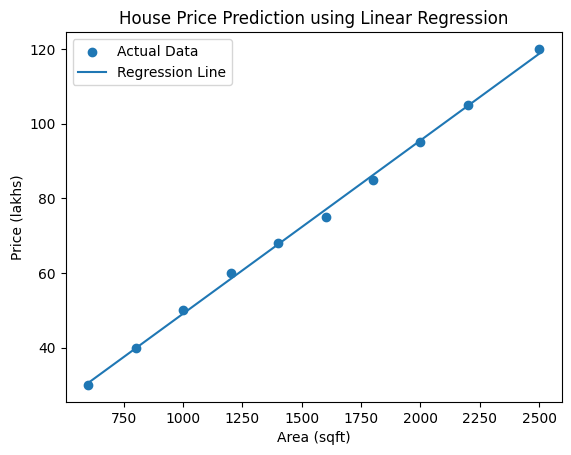

In [20]:
# Scenario: Predicting House Prices Based on Area

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Create Dataset
data = {
    "Area_sqft": [600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2500],
    "Price_lakhs": [30, 40, 50, 60, 68, 75, 85, 95, 105, 120]
}

df = pd.DataFrame(data)

print("Dataset:\n")
print(df)

# Define Features (X) and Target (y)
X = df[["Area_sqft"]]
y = df["Price_lakhs"]   # 1D target (best practice)

# Split dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Print Model Parameters
print("\nSlope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)

# Make Predictions on Test Set
y_pred = model.predict(X_test)

print("\nActual vs Predicted:\n")
for actual, pred in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Absolute Error:", round(mae, 4))
print("R2 Score:", round(r2, 6))

# Predict New House Price (1800 sqft)
new_area = pd.DataFrame([[1800]], columns=["Area_sqft"])
predicted_price = model.predict(new_area)[0]

print(f"\nPredicted price for 1800 sqft house: Rs {predicted_price:.2f} lakhs")

# Visualization
plt.scatter(X, y, label="Actual Data")
plt.plot(X, model.predict(X), label="Regression Line")
plt.xlabel("Area (sqft)")
plt.ylabel("Price (lakhs)")
plt.title("House Price Prediction using Linear Regression")
plt.legend()
plt.show()

Dataset:

   Experience_years  Salary_lpa
0               0.5         3.0
1               1.0         3.5
2               2.0         4.5
3               3.0         5.2
4               4.0         6.0

Slope (m): 0.7623129251700681
Intercept (b): 2.8900680272108836

Actual vs Predicted:

Actual: 6.80, Predicted: 6.70
Actual: 3.00, Predicted: 3.27
Actual: 10.50, Predicted: 10.51

Mean Absolute Error: 0.128
R2 Score: 0.997

Predicted salary for 5 years experience: 6.70 LPA


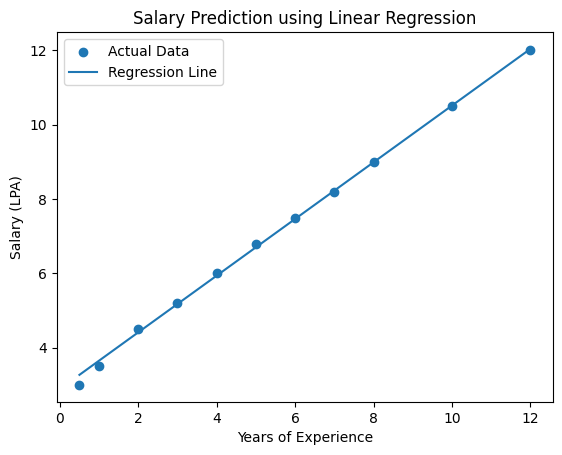

In [25]:
# Predicting Employee Salary Based on Experience

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("salary_lpa - Sheet1.csv")

print("Dataset:\n")
print(df.head())

# Define Features and Target (FIXED)
X = df[["Experience_years"]]
y = df["Salary_lpa"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

print("\nSlope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)

# Predict
y_pred = model.predict(X_test)

print("\nActual vs Predicted:\n")
for actual, pred in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Absolute Error:", round(mae, 3))
print("R2 Score:", round(r2, 4))

# Predict new salary (example: 5 years experience)
new_exp = pd.DataFrame([[5]], columns=["Experience_years"])
predicted_salary = model.predict(new_exp)[0]

print(f"\nPredicted salary for 5 years experience: {predicted_salary:.2f} LPA")

# Visualization
plt.scatter(X, y, label="Actual Data")
plt.plot(X, model.predict(X), label="Regression Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (LPA)")
plt.title("Salary Prediction using Linear Regression")
plt.legend()
plt.show()

In [27]:
#Multilinear Regression Scenario

# Scenario: Predicting House Price Based on Multiple Factors

# A real estate company wants to predict the price of a house based on several important features:

# Area (square feet)

# Number of bedrooms

# Age of the house (years)

# Distance from city center (km)

# Since multiple factors influence price, we use Multiple Linear Regression.

# Price=b0+b1(Area)+b2(Bedrooms)+b3(Age)+b4(Distance)
# Multiple Linear Regression: House Price Prediction

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Create Sample Dataset
data = {
    "Area_sqft": [1000, 1200, 1500, 1800, 2000, 2200, 2500, 2700, 3000, 3200],
    "Bedrooms": [2, 2, 3, 3, 4, 4, 4, 5, 5, 5],
    "Age_years": [10, 8, 6, 5, 7, 4, 3, 2, 1, 1],
    "Distance_km": [12, 10, 8, 7, 6, 5, 4, 3, 2, 1],
    "Price_lakhs": [50, 55, 65, 75, 85, 95, 110, 120, 135, 150]
}

df = pd.DataFrame(data)

print("Dataset:\n")
print(df)

# Define Features (X) and Target (y)
X = df[["Area_sqft", "Bedrooms", "Age_years", "Distance_km"]]
y = df["Price_lakhs"]

# Split dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Print Coefficients
print("\nIntercept (b0):", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

# Predictions
y_pred = model.predict(X_test)

print("\nActual vs Predicted:\n")
for actual, pred in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Absolute Error:", round(mae, 3))
print("R2 Score:", round(r2, 4))

# Predict New House Price
new_house = pd.DataFrame([[2000, 4, 5, 6]],
                         columns=["Area_sqft", "Bedrooms", "Age_years", "Distance_km"])

predicted_price = model.predict(new_house)[0]

print(f"\nPredicted price for new house: {predicted_price:.2f} lakhs")

Dataset:

   Area_sqft  Bedrooms  Age_years  Distance_km  Price_lakhs
0       1000         2         10           12           50
1       1200         2          8           10           55
2       1500         3          6            8           65
3       1800         3          5            7           75
4       2000         4          7            6           85
5       2200         4          4            5           95
6       2500         4          3            4          110
7       2700         5          2            3          120
8       3000         5          1            2          135
9       3200         5          1            1          150

Intercept (b0): -118.6624203821658
Coefficients:
Area_sqft: 0.08025477707006377
Bedrooms: 0.2547770700636791
Age_years: -0.3503184713375812
Distance_km: 7.579617834394923

Actual vs Predicted:

Actual: 135.00, Predicted: 138.18
Actual: 55.00, Predicted: 51.15

Mean Absolute Error: 3.519
R2 Score: 0.9922

Predicted price for new

In [1]:
# Scenario: Predicting Employee Salary Based on Multiple Factors

# A company wants to predict employee salary based on several important factors:

# Years of Experience

# Education Level (1 = Bachelor, 2 = Master, 3 = PhD)

# Number of Skills Known

# Performance Rating (1 to 5)

# Since salary depends on multiple variables, the company uses Multiple Linear Regression.

# Salary=b0​+b1​(Experience)+b2​(EducationLevel)+b3​(Skills)+b4​(Performance)
import pandas as pd
from sklearn.linear_model import LinearRegression

# Sample data
data = {
    "Experience": [1, 2, 3, 4, 5],
    "EducationLevel": [1, 1, 2, 2, 3],
    "Skills": [3, 4, 5, 6, 7],
    "Performance": [2, 3, 3, 4, 5],
    "Salary": [3, 4, 6, 8, 11]
}

df = pd.DataFrame(data)

X = df[["Experience", "EducationLevel", "Skills", "Performance"]]
y = df["Salary"]

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -1.9999999999999982
Coefficients: [0.125 1.75  0.125 1.25 ]


In [2]:
# Scenario: Predicting Delivery Time for E-commerce Orders. An e-commerce company wants to predict how long an order will take to deliver based on:
# Distance to customer (km), Number of items in the order, Traffic level (1 = Low, 2 = Medium, 3 = High) and Warehouse processing time (hours)
# Since multiple factors affect delivery time, they use Multiple Linear Regression. DeliveryTime=b0​+b1​(Distance)+b2​(Items)+b3​(Traffic)+b4​(ProcessingTime).Use the below mentioned 
link to access the database

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Step 1: Create Sample Dataset
data = {
    "Distance_km": [5, 10, 15, 7, 20, 12, 8, 25],
    "Number_of_Items": [2, 5, 3, 4, 6, 2, 3, 7],
    "Traffic_Level": [1, 2, 3, 1, 3, 2, 1, 3],  # 1=Low, 2=Medium, 3=High
    "Processing_Time_hr": [1, 2, 2, 1, 3, 2, 1, 3],
    "Delivery_Time_hr": [3, 6, 8, 4, 12, 7, 5, 14]
}

df = pd.DataFrame(data)

print("Dataset:\n")
print(df)

# Step 2: Define Features (X) and Target (y)
X = df[["Distance_km", "Number_of_Items", "Traffic_Level", "Processing_Time_hr"]]
y = df["Delivery_Time_hr"]

# Step 3: Split dataset (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Create Model
model = LinearRegression()

# Step 5: Train Model
model.fit(X_train, y_train)

# Step 6: Model Parameters
print("\nIntercept (b0):", model.intercept_)
print("Coefficients (b1, b2, b3, b4):", model.coef_)

# Step 7: Predict on Test Data
y_pred = model.predict(X_test)

print("\nActual vs Predicted:")
for actual, pred in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

# Step 8: Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Absolute Error:", mae)
print("R2 Score:", r2)

# Step 9: Predict for New Order
new_order = pd.DataFrame([[10, 4, 2, 2]],
                         columns=["Distance_km", "Number_of_Items", "Traffic_Level", "Processing_Time_hr"])

predicted_time = model.predict(new_order)

print(f"\nPredicted Delivery Time for new order: {predicted_time[0]:.2f} hours")

Dataset:

   Distance_km  Number_of_Items  Traffic_Level  Processing_Time_hr  \
0            5                2              1                   1   
1           10                5              2                   2   
2           15                3              3                   2   
3            7                4              1                   1   
4           20                6              3                   3   
5           12                2              2                   2   
6            8                3              1                   1   
7           25                7              3                   3   

   Delivery_Time_hr  
0                 3  
1                 6  
2                 8  
3                 4  
4                12  
5                 7  
6                 5  
7                14  

Intercept (b0): 0.1985294117646994
Coefficients (b1, b2, b3, b4): [ 0.48529412 -0.07352941 -0.83088235  1.61764706]

Actual vs Predicted:
Actual: 6.00, Predicte

In [3]:
# Multiple Linear Regression
# Scenario: Predicting Delivery Time for E-commerce Orders

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Step 1: Create Sample Dataset
data = {
    "Distance_km": [5, 10, 15, 7, 20, 12, 8, 25],
    "Number_of_Items": [2, 5, 3, 4, 6, 2, 3, 7],
    "Traffic_Level": [1, 2, 3, 1, 3, 2, 1, 3],  # 1=Low, 2=Medium, 3=High
    "Processing_Time_hr": [1, 2, 2, 1, 3, 2, 1, 3],
    "Delivery_Time_hr": [3, 6, 8, 4, 12, 7, 5, 14]
}

df = pd.DataFrame(data)

print("Dataset:\n")
print(df)

# Step 2: Define Features (X) and Target (y)
X = df[["Distance_km", "Number_of_Items", "Traffic_Level", "Processing_Time_hr"]]
y = df["Delivery_Time_hr"]

# Step 3: Split dataset (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Create Model
model = LinearRegression()

# Step 5: Train Model
model.fit(X_train, y_train)

# Step 6: Model Parameters
print("\nIntercept (b0):", model.intercept_)
print("Coefficients (b1, b2, b3, b4):", model.coef_)

# Step 7: Predict on Test Data
y_pred = model.predict(X_test)

print("\nActual vs Predicted:")
for actual, pred in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

# Step 8: Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Absolute Error:", mae)
print("R2 Score:", r2)

# Step 9: Predict for New Order
new_order = pd.DataFrame([[10, 4, 2, 2]],
                         columns=["Distance_km", "Number_of_Items", "Traffic_Level", "Processing_Time_hr"])

predicted_time = model.predict(new_order)

print(f"\nPredicted Delivery Time for new order: {predicted_time[0]:.2f} hours")

Dataset:

   Distance_km  Number_of_Items  Traffic_Level  Processing_Time_hr  \
0            5                2              1                   1   
1           10                5              2                   2   
2           15                3              3                   2   
3            7                4              1                   1   
4           20                6              3                   3   
5           12                2              2                   2   
6            8                3              1                   1   
7           25                7              3                   3   

   Delivery_Time_hr  
0                 3  
1                 6  
2                 8  
3                 4  
4                12  
5                 7  
6                 5  
7                14  

Intercept (b0): 0.1985294117646994
Coefficients (b1, b2, b3, b4): [ 0.48529412 -0.07352941 -0.83088235  1.61764706]

Actual vs Predicted:
Actual: 6.00, Predicte

In [4]:
# Scenario: Predicting Used Car Prices

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# -----------------------
# Step 1: Create Dataset
# -----------------------

data = {
    "Engine_Size": [1.2,1.5,1.8,2.0,2.2,1.3,1.6,2.4,2.0,1.4,1.7,2.5,1.8,2.2,1.5],
    "Mileage": [90,70,60,50,40,85,65,30,45,80,55,25,50,35,75],
    "Age": [8,6,5,4,3,7,6,2,4,7,5,1,3,2,6],
    "Horsepower": [80,95,110,130,150,85,100,180,140,90,115,200,125,160,105],
    "Price": [3.5,5,6,8,10,4,5.5,14,9,4.5,6.5,16,8.5,12,5.2]
}

df = pd.DataFrame(data)

print("Dataset:\n")
print(df.head())

# -----------------------
# Step 2: Basic EDA
# -----------------------

print("\nStatistical Summary:\n")
print(df.describe())

# Correlation Heatmap
plt.figure()
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

# -----------------------
# Step 3: Define Features & Target
# -----------------------

X = df[["Engine_Size", "Mileage", "Age", "Horsepower"]]
y = df["Price"]

# -----------------------
# Step 4: Train-Test Split
# -----------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------
# Step 5: Train Model
# -----------------------

model = LinearRegression()
model.fit(X_train, y_train)

print("\nIntercept (b0):", model.intercept_)
print("Coefficients:", model.coef_)

# -----------------------
# Step 6: Predictions
# -----------------------

y_pred = model.predict(X_test)

print("\nActual vs Predicted:")
for actual, pred in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

# -----------------------
# Step 7: Evaluation
# -----------------------

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Absolute Error:", mae)
print("R2 Score:", r2)

# -----------------------
# Step 8: Predict New Car Price
# -----------------------

new_car = pd.DataFrame([[2.0, 40, 3, 150]],
                       columns=["Engine_Size", "Mileage", "Age", "Horsepower"])

predicted_price = model.predict(new_car)

print(f"\nPredicted Price for new car: {predicted_price[0]:.2f} lakhs")


ModuleNotFoundError: No module named 'seaborn'

Dataset:

    Engine_Size  Mileage  Age  Horsepower  Price
0           1.2       90    8          80    3.5
1           1.5       70    6          95    5.0
2           1.8       60    5         110    6.0
3           2.0       50    4         130    8.0
4           2.2       40    3         150   10.0
5           1.3       85    7          85    4.0
6           1.6       65    6         100    5.5
7           2.4       30    2         180   14.0
8           2.0       45    4         140    9.0
9           1.4       80    7          90    4.5
10          1.7       55    5         115    6.5
11          2.5       25    1         200   16.0
12          1.8       50    3         125    8.5
13          2.2       35    2         160   12.0
14          1.5       75    6         105    5.2

Statistical Summary:

       Engine_Size    Mileage        Age  Horsepower      Price
count    15.000000  15.000000  15.000000   15.000000  15.000000
mean      1.806667  57.000000   4.600000  124.333333   

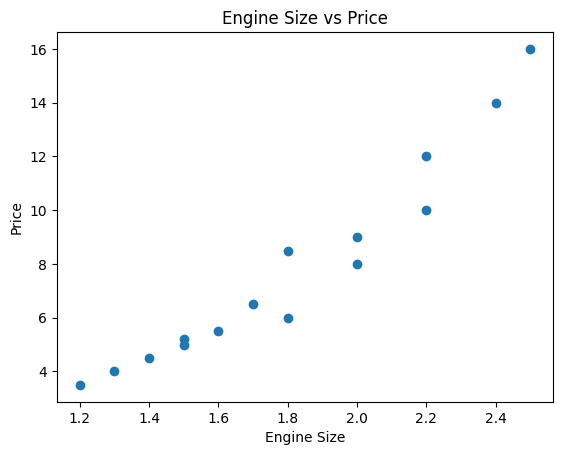


Intercept (b0): 0.24841323195327547
Coefficients: [-2.55064850e+00 -3.57689276e-04 -3.96609428e-01  1.12434570e-01]

Actual vs Predicted:
Actual: 4.50, Predicted: 3.99
Actual: 16.00, Predicted: 15.95
Actual: 3.50, Predicted: 2.98

Mean Absolute Error: 0.35925894802726005
R2 Score: 0.9944693487104425

Predicted Price for new car: 10.81 lakhs


In [5]:
# Scenario: Predicting Used Car Prices

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# -----------------------
# Step 1: Create Dataset
# -----------------------

data = {
    "Engine_Size": [1.2,1.5,1.8,2.0,2.2,1.3,1.6,2.4,2.0,1.4,1.7,2.5,1.8,2.2,1.5],
    "Mileage": [90,70,60,50,40,85,65,30,45,80,55,25,50,35,75],
    "Age": [8,6,5,4,3,7,6,2,4,7,5,1,3,2,6],
    "Horsepower": [80,95,110,130,150,85,100,180,140,90,115,200,125,160,105],
    "Price": [3.5,5,6,8,10,4,5.5,14,9,4.5,6.5,16,8.5,12,5.2]
}

df = pd.DataFrame(data)

print("Dataset:\n")
print(df)

# -----------------------
# Step 2: Basic EDA
# -----------------------

print("\nStatistical Summary:\n")
print(df.describe())

print("\nCorrelation Matrix:\n")
print(df.corr())

# Simple scatter plot (Engine Size vs Price)
plt.figure()
plt.scatter(df["Engine_Size"], df["Price"])
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Engine Size vs Price")
plt.show()

# -----------------------
# Step 3: Define Features & Target
# -----------------------

X = df[["Engine_Size", "Mileage", "Age", "Horsepower"]]
y = df["Price"]

# -----------------------
# Step 4: Train-Test Split
# -----------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------
# Step 5: Train Model
# -----------------------

model = LinearRegression()
model.fit(X_train, y_train)

print("\nIntercept (b0):", model.intercept_)
print("Coefficients:", model.coef_)

# -----------------------
# Step 6: Predictions
# -----------------------

y_pred = model.predict(X_test)

print("\nActual vs Predicted:")
for actual, pred in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

# -----------------------
# Step 7: Evaluation
# -----------------------

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Absolute Error:", mae)
print("R2 Score:", r2)

# -----------------------
# Step 8: Predict New Car Price
# -----------------------

new_car = pd.DataFrame([[2.0, 40, 3, 150]],
                       columns=["Engine_Size", "Mileage", "Age", "Horsepower"])

predicted_price = model.predict(new_car)

print(f"\nPredicted Price for new car: {predicted_price[0]:.2f} lakhs")

Model Accuracy: 0.77


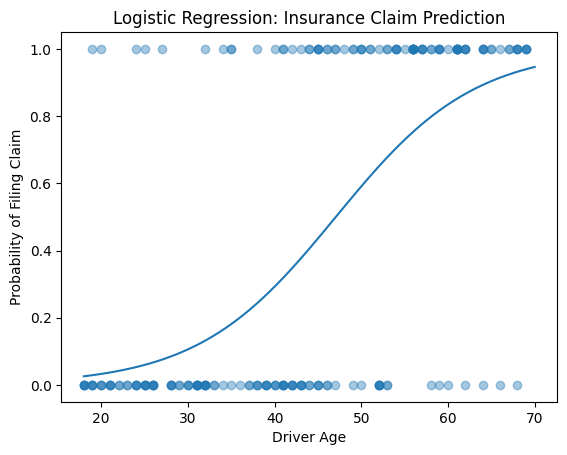

Probability crosses 50% at age ≈ 47.1


In [4]:
# Logistic Regression Demo: Insurance Claim Prediction

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Create synthetic dataset
np.random.seed(42)
ages = np.random.randint(18, 70, 200)

# True probability (increases with age)
true_prob = 1 / (1 + np.exp(-(ages - 45) / 8))
claims = np.random.binomial(1, true_prob)

data = pd.DataFrame({"Age": ages, "Claim": claims})

# 2. Split dataset
X = data[["Age"]]
y = data["Claim"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# 5. Plot logistic curve
age_range = np.linspace(18, 70, 300)
age_range_df = pd.DataFrame({"Age": age_range})
probabilities = model.predict_proba(age_range_df)[:, 1]

plt.figure()
plt.scatter(X, y, alpha=0.4)
plt.plot(age_range, probabilities)
plt.xlabel("Driver Age")
plt.ylabel("Probability of Filing Claim")
plt.title("Logistic Regression: Insurance Claim Prediction")
plt.show()

# 6. Age where probability = 50%
b0 = model.intercept_[0]
b1 = model.coef_[0][0]
age_50 = -b0 / b1
print(f"Probability crosses 50% at age ≈ {age_50:.1f}")

Columns in dataset: Index(['BMI', 'Diabetes'], dtype='str')
Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 2]]


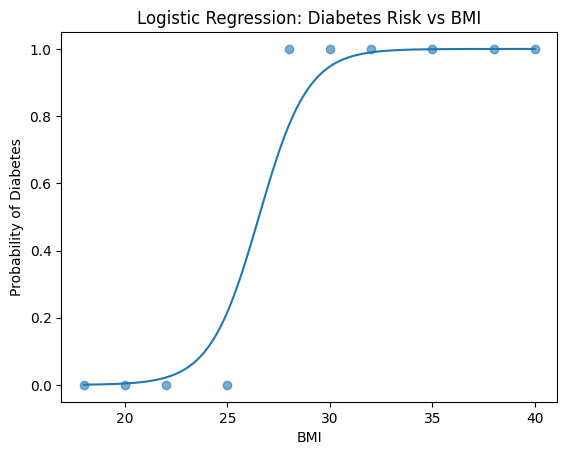

Probability crosses 50% at BMI ≈ 26.54


In [15]:
# Logistic Regression: Diabetes Prediction using BMI

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset using FULL path
data = pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\BMI_dataset-Sheet1.csv")

# Remove extra spaces in column names (important)
data.columns = data.columns.str.strip()

print("Columns in dataset:", data.columns)

# Define feature and target
X = data[["BMI"]]
y = data["Diabetes"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot logistic curve
bmi_range = np.linspace(X["BMI"].min(), X["BMI"].max(), 300)
bmi_df = pd.DataFrame({"BMI": bmi_range})
probabilities = model.predict_proba(bmi_df)[:, 1]

plt.figure()
plt.scatter(X, y, alpha=0.6)
plt.plot(bmi_range, probabilities)
plt.xlabel("BMI")
plt.ylabel("Probability of Diabetes")
plt.title("Logistic Regression: Diabetes Risk vs BMI")
plt.show()

# 50% probability boundary
b0 = model.intercept_[0]
b1 = model.coef_[0][0]
bmi_50 = -b0 / b1

print("Probability crosses 50% at BMI ≈", round(bmi_50, 2))

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

X = np.array([
    [50, 1, 0.8],    
    [200, 0, 0.1],   
    [30, 1, 0.9],   
    [180, 0, 0.05],  
    [10, 1, 0.95],   
    [220, 0, 0.08],  
])

y = np.array([1, 0, 1, 0, 1, 0])   

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

y_prob = model.predict_proba(X_test)
print("\nPredicted Probabilities (Not Spam, Spam):\n", y_prob)

new_email = np.array([[40, 1, 0.7]])

prediction = model.predict(new_email)
probability = model.predict_proba(new_email)

print("\nNew Email Prediction (0=Not Spam, 1=Spam):", prediction[0])
print("Probability (Not Spam, Spam):", probability[0])

Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]

Predicted Probabilities (Not Spam, Spam):
 [[4.08345109e-03 9.95916549e-01]
 [9.99912213e-01 8.77865439e-05]]

New Email Prediction (0=Not Spam, 1=Spam): 1
Probability (Not Spam, Spam): [0.00152269 0.99847731]


In [17]:
# Scenario
# A streaming platform wants to recommend movies to users based on their preferences.
#  Each movie is rated on three aspects:
# - Action Rating (how action‑packed it is)
# - Comedy Rating (how funny it is)
# - Drama Rating (how emotional it is)
# The platform collects data from past users about whether they liked (1) or didn’t like (0) certain movies.

# Question for Students
# Using the K‑Nearest Neighbors (KNN) algorithm:
# - Split the dataset into training and testing sets.
# - Scale the features (important for KNN).
# - Train models with different values of K (e.g., 1, 3, 5). Compare their accuracies.
# - Select the best model and predict whether a new user who prefers [Action=4, Comedy=2, Drama=4] will like the movie.
# - Discuss: How does changing K affect the model’s predictions?

# This scenario makes KNN relatable to recommendation systems like Netflix or Spotify, showing students how algorithms decide what they might enjoy.
# KNN: Movie Recommendation Example

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
 
X = np.array([
    [5, 1, 4],  # Liked
    [4, 2, 5],  # Liked
    [1, 5, 2],  # Not liked
    [2, 4, 1],  # Not liked
    [4, 3, 4],  # Liked
    [1, 4, 3],  # Not liked
    [5, 2, 5],  # Liked
    [2, 5, 1],  # Not liked
    [4, 1, 5],  # Liked
    [1, 3, 2],  # Not liked
])

y = np.array([1,1,0,0,1,0,1,0,1,0])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


k_values = [1, 3, 5]
accuracies = {}

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    
    accuracies[k] = acc
    print(f"K={k}, Accuracy={acc:.2f}")

best_k = max(accuracies, key=accuracies.get)
print("\nBest K:", best_k)

best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train_scaled, y_train)


new_user = np.array([[4, 2, 4]])
new_user_scaled = scaler.transform(new_user)

prediction = best_model.predict(new_user_scaled)

print("\nPrediction for [4,2,4]:", 
      "Liked" if prediction[0] == 1 else "Not Liked")

K=1, Accuracy=1.00
K=3, Accuracy=1.00
K=5, Accuracy=1.00

Best K: 1

Prediction for [4,2,4]: Liked


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = [[5,2,3],[4,1,4],[1,5,2],[2,4,1],[5,1,5],
     [3,5,1],[1,4,3],[5,3,4],[2,1,4],[3,4,2]]
y = [1, 1, 0, 0, 1, 0, 0, 1, 1, 0]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

for k in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    print(f"K={k}  Accuracy={acc:.2f}")

best_knn = KNeighborsClassifier(n_neighbors=3)
best_knn.fit(X_train, y_train)
new_user = scaler.transform([[4, 2, 4]])
print("Will they like it?", best_knn.predict(new_user)[0])


K=1  Accuracy=1.00
K=3  Accuracy=1.00
K=5  Accuracy=1.00
Will they like it? 1


In [27]:
# Scenario 🩺
# A fitness app wants to predict whether a person is at risk of heart disease based on three lifestyle indicators:
# - Exercise Level (hours of physical activity per week)
# - Diet Quality (rating from 1–5, higher = healthier)
# - Stress Level (rating from 1–5, higher = more stress)
# The app collects data from users and labels them as 1 = At Risk or 0 = Not at Risk.
# Question for Students
# Using the K‑Nearest Neighbors (KNN) algorithm:
# - Split the dataset into training and testing sets.
# - Scale the features (important for KNN).
# - Train models with different values of K (e.g., 1, 3, 5). Compare their accuracies.
# - Select the best model and predict whether a new user with [Exercise=4, Diet=3, Stress=4] is at risk of heart disease.
# - Discuss: Why does scaling matter in KNN, and how does changing K affect predictions?
# KNN: Heart Disease Risk Prediction

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

data = pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\Fitness_app_dataset - Sheet1.csv")

data.columns = data.columns.str.strip()

print("Columns in dataset:")
print(data.columns)
print("\nFirst 5 rows:")
print(data.head())

X = data.iloc[:, :-1]   # All columns except last
y = data.iloc[:, -1]    # Last

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = [1, 3, 5]
accuracies = {}

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    
    accuracies[k] = acc
    print(f"K = {k}, Accuracy = {acc:.2f}")



best_k = max(accuracies, key=accuracies.get)
print("\nBest K:", best_k)

best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train_scaled, y_train)

new_user = np.array([[4, 3, 4]])  # [Exercise, Diet, Stress]
new_user_scaled = scaler.transform(new_user)

prediction = best_model.predict(new_user_scaled)

print("\nPrediction for [4,3,4]:",
      "At Risk" if prediction[0] == 1 else "Not at Risk")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, best_model.predict(X_test_scaled)))

Columns in dataset:
Index(['Exercise', 'Diet', 'Stress', 'AtRisk'], dtype='str')

First 5 rows:
   Exercise  Diet  Stress  AtRisk
0         5     4       2       0
1         3     3       4       1
2         2     2       5       1
3         6     5       1       0
4         4     2       4       1
K = 1, Accuracy = 1.00
K = 3, Accuracy = 1.00
K = 5, Accuracy = 1.00

Best K: 1

Prediction for [4,3,4]: At Risk

Confusion Matrix:
[[1 0]
 [0 2]]


C:\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Accuracy: 1.0
Confusion Matrix:
 [[2 0]
 [0 1]]


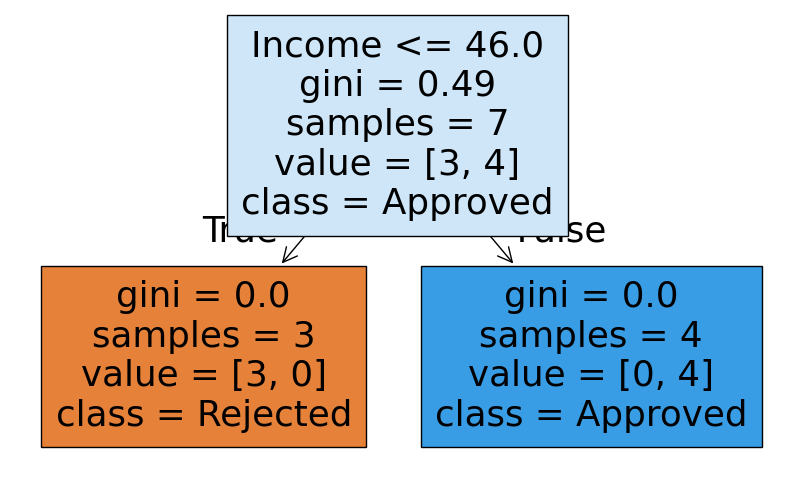


Prediction for new applicant: Approved


In [28]:
# Decision Tree: Loan Approval

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

X = np.array([
    [720, 60, 1], 
    [580, 35, 0], 
    [700, 55, 1],
    [600, 40, 1], 
    [750, 80, 1], 
    [500, 25, 0],
    [680, 50, 1], 
    [550, 30, 0], 
    [730, 70, 1],
    [610, 42, 0],
])

y = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10,6))
plot_tree(model,
          feature_names=["Credit Score", "Income", "Employment"],
          class_names=["Rejected", "Approved"],
          filled=True)
plt.show()

new_applicant = np.array([[690, 50, 1]])

prediction = model.predict(new_applicant)

print("\nPrediction for new applicant:",
      "Approved" if prediction[0] == 1 else "Rejected")

Accuracy: 1.0
Confusion Matrix:
 [[2 0]
 [0 1]]


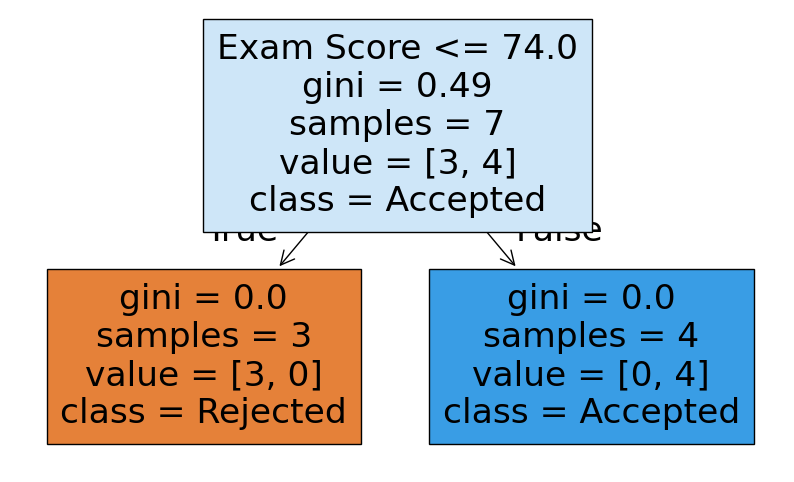


Prediction for new applicant: Accepted


In [29]:
# Scenario: University Admissions Rulebook
# Imagine you’re an admissions officer at a university. Every day, students apply for admission, and you need to decide whether to accept or reject them.
# Instead of guessing, you build a rulebook (that’s your Decision Tree).

# The Data
# - Each applicant has:
# - High School GPA (how well they performed academically)
# - Entrance Exam Score (their standardized test performance)
# - Extracurriculars (1 = active in clubs/sports, 0 = not active)
# - Past applications are labeled:
# - 1 = Accepted
# - 0 = Rejected
# This past data is like your training experience.

# Just like the loan officer uses credit score, income, and employment status to decide, here the admissions officer uses GPA, exam scores, and extracurriculars to make decisions.
# Decision Tree: University Admissions

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

X = np.array([
    [3.8, 85, 1],
    [2.9, 60, 0],
    [3.5, 78, 1],
    [3.0, 65, 0],
    [3.9, 92, 1],
    [2.5, 55, 0],
    [3.6, 80, 1],
    [2.8, 58, 0],
    [3.7, 88, 1],
    [3.1, 70, 0],
])

y = np.array([1,0,1,0,1,0,1,0,1,0])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = DecisionTreeClassifier(criterion="gini", random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10,6))
plot_tree(model,
          feature_names=["GPA", "Exam Score", "Extracurricular"],
          class_names=["Rejected", "Accepted"],
          filled=True)
plt.show()

new_student = np.array([[3.6, 82, 1]])

prediction = model.predict(new_student)

print("\nPrediction for new applicant:",
      "Accepted" if prediction[0] == 1 else "Rejected")

Confusion Matrix:
[[4 1]
 [1 4]]


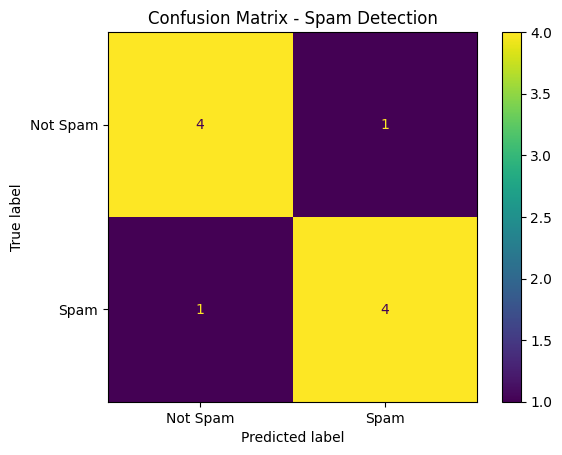

In [31]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = np.array([1,0,1,1,0,0,1,0,1,0])

y_pred = np.array([1,0,1,0,0,0,1,1,1,0])

cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Not Spam", "Spam"])

disp.plot()
plt.title("Confusion Matrix - Spam Detection")
plt.show()

   CustomerID  Age  AnnualIncome  SpendingScore  Cluster
0           1   25         25000             30        2
1           2   45         60000             70        1
2           3   35         40000             50        0
3           4   23         20000             20        2
4           5   52         80000             90        1
5           6   40         50000             60        0


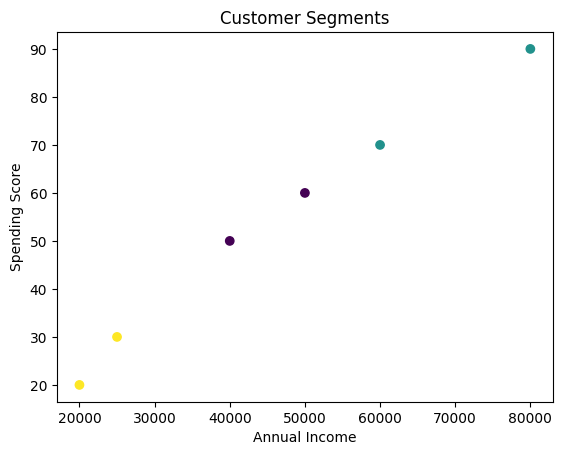

In [5]:
# Example: Customer Segmentation for a Retail Company 🛍️
# Business Context
# A retail chain wants to understand its customers better. Instead of treating everyone the same,
# they want to group customers into segments (like “budget shoppers,” “loyal premium buyers,” etc.)
#  so they can:
# - Personalize marketing campaigns
# - Recommend products more effectively
# - Improve customer retention

# Dataset (simplified)
# Imagine we have customer data with features like:
# - Annual Income (numeric)
# - Spending Score (numeric, based on purchase behavior)
# - Age (numeric)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Create dataset
data = {
    'CustomerID': [1,2,3,4,5,6],
    'Age': [25,45,35,23,52,40],
    'AnnualIncome': [25000,60000,40000,20000,80000,50000],
    'SpendingScore': [30,70,50,20,90,60]
}

df = pd.DataFrame(data)

# Select features (correct column names)
X = df[['Age', 'AnnualIncome', 'SpendingScore']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Print result
print(df)

# Visualization
plt.scatter(df['AnnualIncome'], df['SpendingScore'], 
            c=df['Cluster'], cmap='viridis')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segments")
plt.show()

   PatientID  Age  BMI  YearlyVisits  ChronicConditions  Cluster
0          1   25   22             1                  0        2
1          2   60   30             8                  3        1
2          3   45   28             5                  2        0
3          4   30   24             2                  0        2
4          5   70   35            10                  4        1
5          6   50   27             6                  2        0
6          7   40   26             4                  1        0
7          8   65   32             9                  3        1


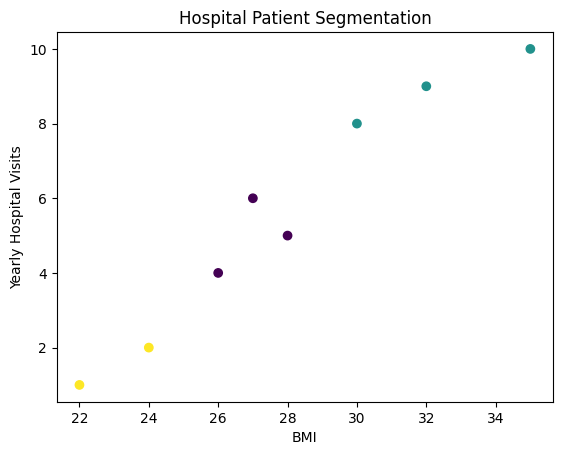

In [7]:
# Example: Hospital Patient Segmentation 🏥
# Business Context
# A hospital wants to improve patient care and resource allocation. Instead of treating all
# patients the same, they want to group them into segments based on health and lifestyle data.
#  This helps with:
# - Designing personalized treatment plans
# - Predicting high‑risk patients
# - Managing hospital resources more efficiently

# Dataset (simplified)
# Features we might use:
# - Age
# - BMI (Body Mass Index)
# - Number of yearly hospital visits
# - Chronic conditions count

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Create sample dataset
data = {
    'PatientID': [1,2,3,4,5,6,7,8],
    'Age': [25, 60, 45, 30, 70, 50, 40, 65],
    'BMI': [22, 30, 28, 24, 35, 27, 26, 32],
    'YearlyVisits': [1, 8, 5, 2, 10, 6, 4, 9],
    'ChronicConditions': [0, 3, 2, 0, 4, 2, 1, 3]
}

df = pd.DataFrame(data)

# Select features
X = df[['Age', 'BMI', 'YearlyVisits', 'ChronicConditions']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Print clustered data
print(df)

# Visualize (BMI vs YearlyVisits)
plt.scatter(df['BMI'], df['YearlyVisits'], 
            c=df['Cluster'], cmap='viridis')

plt.xlabel("BMI")
plt.ylabel("Yearly Hospital Visits")
plt.title("Hospital Patient Segmentation")
plt.show()

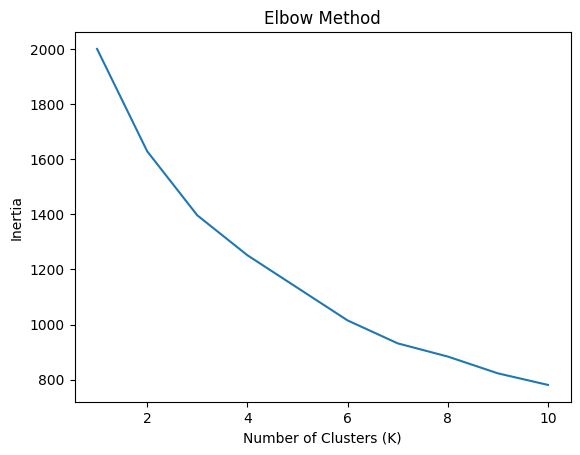

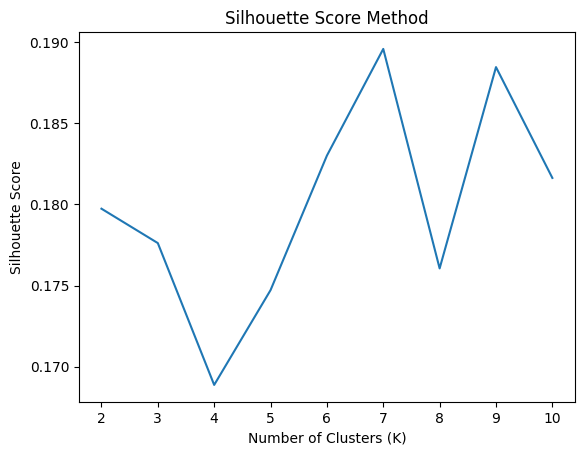

Best K based on Silhouette Score: 7
Highest Silhouette Score: 0.1895649010815127

Clustered Data Sample:
   MonthlyBill  CallDuration  InternetUsage  SupportCalls  Cluster
0    79.934283    374.094204      70.990332             3        1
1    67.234714    452.753331      63.869505             1        2
2    82.953771    188.114594      50.894456             5        4
3   100.460597    345.037539      40.295948             2        3
4    65.316933    247.948594      60.473350             6        6


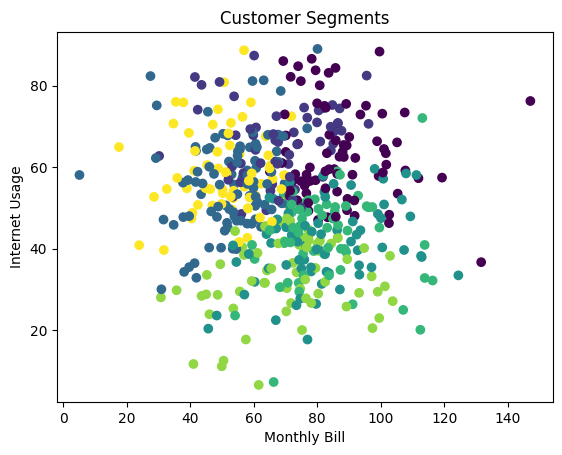

In [8]:
# ================================
# Telecom Customer Segmentation
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


np.random.seed(42)
dfghg
data = {
    'MonthlyBill': np.random.normal(70, 20, 500),
    'CallDuration': np.random.normal(300, 80, 500),
    'InternetUsage': np.random.normal(50, 15, 500),
    'SupportCalls': np.random.poisson(3, 500)
}

df = pd.DataFrame(data)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), inertia)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure()
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Method")
plt.show()

# Print best silhouette score
best_k = range(2, 11)[np.argmax(silhouette_scores)]
print("Best K based on Silhouette Score:", best_k)
print("Highest Silhouette Score:", max(silhouette_scores))

optimal_k = best_k

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("\nClustered Data Sample:")
print(df.head())

# -------------------------------
# Step 6: Visualize Clusters
# (Example: Monthly Bill vs Internet Usage)
# -------------------------------

plt.figure()
plt.scatter(df['MonthlyBill'], df['InternetUsage'], c=df['Cluster'])
plt.xlabel("Monthly Bill")
plt.ylabel("Internet Usage")
plt.title("Customer Segments")
plt.show()

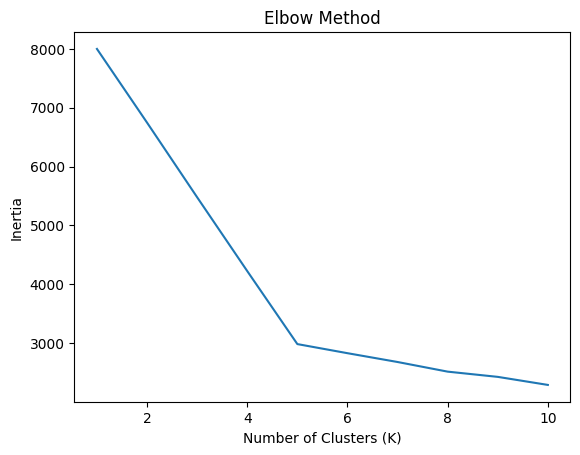

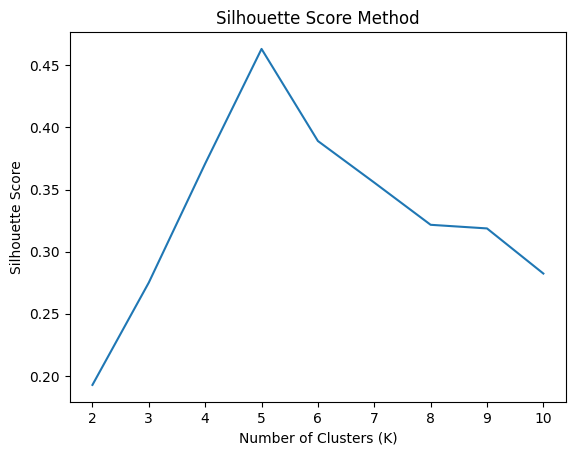

Best K based on Silhouette Score: 5
Highest Silhouette Score: 0.4631523152097299

Sample of Clustered Data:
   WatchTimePerWeek  DevicesUsed  SubscriptionPauses PreferredGenre  Cluster
0         11.986857            3                   0          SciFi        1
1          9.446943            1                   2          SciFi        1
2         12.590754            3                   2          Drama        4
3         16.092119            1                   3          SciFi        1
4          9.063387            3                   2        Romance        2


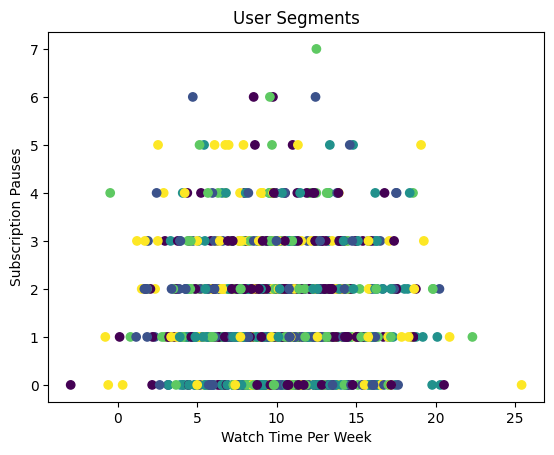

In [9]:
# Scenario: Movie Streaming Platform
# A movie streaming company has collected data on 1,000 users, including:
# - Average watch time per week
# - Preferred genres (action, comedy, drama, etc.)
# - Number of devices used (TV, phone, tablet)
# - Frequency of subscription pauses or cancellations
# The company wants to group users into meaningful segments to:
# - Recommend personalized movie lists
# - Design loyalty rewards for binge‑watchers
# - Identify users at risk of canceling subscriptions
# Your Tasks
# - Apply K‑Means clustering to explore possible user segments.
# - Example clusters: “Weekend binge‑watchers", “Casual family viewers,” “Genre loyalists.”
# - Use the Elbow Method to find the point where adding more clusters doesn’t improve grouping much.
# - This helps decide whether 3, 4, or 5 clusters make sense.
# - Validate with Silhouette Score to check if the chosen clusters are well‑separated and meaningful.
# - Ensures that “binge‑watchers” aren’t mixed up with “casual viewers.”
# ==========================================
# Movie Streaming Platform - User Segmentation
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

np.random.seed(42)

n = 1000

data = {
    'WatchTimePerWeek': np.random.normal(10, 4, n),  # hours
    'DevicesUsed': np.random.randint(1, 4, n),       # 1 to 3 devices
    'SubscriptionPauses': np.random.poisson(1.5, n), # number of pauses
    'PreferredGenre': np.random.choice(
        ['Action', 'Comedy', 'Drama', 'SciFi', 'Romance'], n)
}

df = pd.DataFrame(data)

df_encoded = pd.get_dummies(df, columns=['PreferredGenre'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), inertia)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure()
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Method")
plt.show()

best_k = range(2, 11)[np.argmax(silhouette_scores)]
print("Best K based on Silhouette Score:", best_k)
print("Highest Silhouette Score:", max(silhouette_scores))

kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("\nSample of Clustered Data:")
print(df.head())

plt.figure()
plt.scatter(df['WatchTimePerWeek'],
            df['SubscriptionPauses'],
            c=df['Cluster'])

plt.xlabel("Watch Time Per Week")
plt.ylabel("Subscription Pauses")
plt.title("User Segments")
plt.show()